## 선형 회귀와 MSE 손실 함수의 Convex 함수 시각화 해보기

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### `X, Y = np.meshgrid(x_range, y_range)`

- 2차원 그리드 포인트의 모든 조합을 생성

- 입력 받는 1D 배열: `x_range`, `y_range`

- 반환되는 배열의 크기
    - 두 배열 모두 행과 열의 수가 동일하다.
    - **행의 수**: 두 번째 인자의 크기(`y_range`)
    - **열의 수**: 첫 번째 인자의 크기(`x_range`)

- 반환되는 배열의 내용
    1. 첫 번째 배열 `X`
        - **각 행** 에는 `x_range`의 모든 값들이 그대로 복사
        - `X`의 **각 행** 은 `x_range`와 동일한 값을 가진다.
        - 이 과정이 `y_range` 의 길이만큼 반복

    2. 두 번째 배열 `Y`:
        - **각 열** 에는 `y_range`의 모든 값들이 그대로 복사
        - `Y`의 **각 열** 은 `y_range`의 값들을 세로로 늘어놓은 것과 같다.
        - 이 과정이 `x_range`의 길이만큼 반복


```
# Input
x_range = [x₁, x₂, x₃, ..., xₙ]
y_range = [y₁, y₂, y₃, ..., yₘ]

# Output
X = [
     [x₁, x₂, x₃, ..., xₙ],
     [x₁, x₂, x₃, ..., xₙ],
     ...
     [x₁, x₂, x₃, ..., xₙ]
    ]

Y = [
     [y₁, y₁, y₁, ..., y₁],
     [y₂, y₂, y₂, ..., y₂],
     ...
     [yₘ, yₘ, yₘ, ..., yₘ]
    ]
```

In [2]:
x_range = np.array([1, 2, 3])  # a_range
y_range = np.array([10, 20])  # b_range
print("x_range:", x_range)
print("-" * 10)
print("y_range:", y_range)

x_range: [1 2 3]
----------
y_range: [10 20]


In [3]:
A, B = np.meshgrid(x_range, y_range)

print(A)
print("-" * 10)
print(B)

[[1 2 3]
 [1 2 3]]
----------
[[10 10 10]
 [20 20 20]]


In [4]:
x_data = np.linspace(0, 1, 500)
y_data = 2 * x_data + 1 + np.random.normal(0, 0.3, 500)  # y = 2x + 1 + 노이즈

# 파라미터 공간 (기울기 a, 절편 b)
a_range = np.linspace(0, 4, 500)  # 실제값(2) 주변으로 설정
b_range = np.linspace(-1, 3, 500)  # 실제값(1) 주변으로 설정

A, B = np.meshgrid(a_range, b_range)

In [5]:
# Z 값 계산(by for-loop)
def cal_mse(a, b, x, y):
    """MSE 계산 함수"""
    y_pred = a * x + b
    return np.mean((y - y_pred) ** 2)


Z = np.zeros_like(A)  # A 크기 만큼 메모리 할당
for i in range(len(b_range)):
    for j in range(len(a_range)):
        # 각 파라미터의 점마다의 손실 계산
        Z[i, j] = cal_mse(A[i, j], B[i, j], x_data, y_data)

In [6]:
# Z 값 계산(by Broadcasting)
# x를 새로운 축으로 확장 (a, b와 브로드캐스팅하기 위해)
x_reshaped = x_data[:, np.newaxis, np.newaxis]  # shape: (n_samples, 1, 1)
y_reshaped = y_data[:, np.newaxis, np.newaxis]  # shape: (n_samples, 1, 1)

# 예측값 계산 (브로드캐스팅 활용)
y_pred = A * x_reshaped + B  # shape: (n_samples, a_points, b_points)

# MSE 계산 (샘플 축으로 평균)
Z = np.mean((y_reshaped - y_pred) ** 2, axis=0)

- Z 를 계산할 때, 두 방식의 시간 차이를 보면 Broadcasting 을 사용하는 것이 훨씬 효율적인 것을 알 수 있다.
- NumPy 관련 계산을 할 때는 최대한 반복문을 지양해야한다.
- 특히 그리드 크기가 클수록(여기서는 500x500) 속도 차이가 더 크게 나타난다.
- 일반적으로 큰 데이터를 처리할 때는 NumPy의 벡터화 연산이 for 루프보다 수십 배에서 수백 배까지 빠를 수 있다.

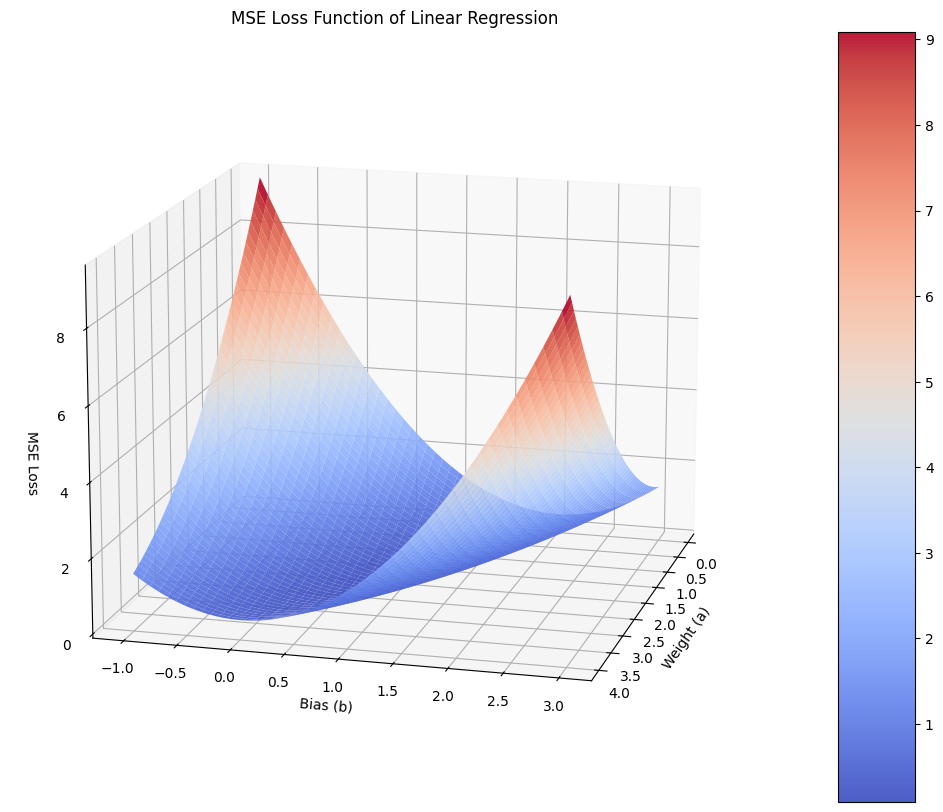

In [19]:
# 3D 그래프 그리기
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(A, B, Z, cmap="coolwarm", alpha=0.9)

ax.set_xlabel("Weight (a)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("MSE Loss")
ax.set_title("MSE Loss Function of Linear Regression")

# 시점 조정 (그릇 모양을 잘 보이게)
# elev(elevation): 고도 90° ~ 90°, azim(azimuth): 방위각 0° ~ 360°
ax.view_init(elev=15, azim=15)

# 컬러바 추가
plt.colorbar(surf, ax=ax, aspect=10)

plt.show()

위 그래프가 흔히 convex 함수를 검색했을 때 나오는 볼록한 그릇 모양이 안 되는 이유는,
- 선형 회귀 모델과 MSE 손실함수의 convex 함수이기 때문이다.
- 선형 회귀의 MSE 손실 함수는 수학적으로 항상 볼록(convex)하다.
- 하지만 선형 회귀에서는 **특별히 특정한 형태의 볼록 함수** 를 가진다.
- 수학적으로는 **2차 함수(quadratic function)** 형태이다.
- 2차 함수 형태의 손실 함수는 "완벽한 그릇" 모양이 아닌, **타원형 포물면(elliptic paraboloid)** 형태를 가진다.

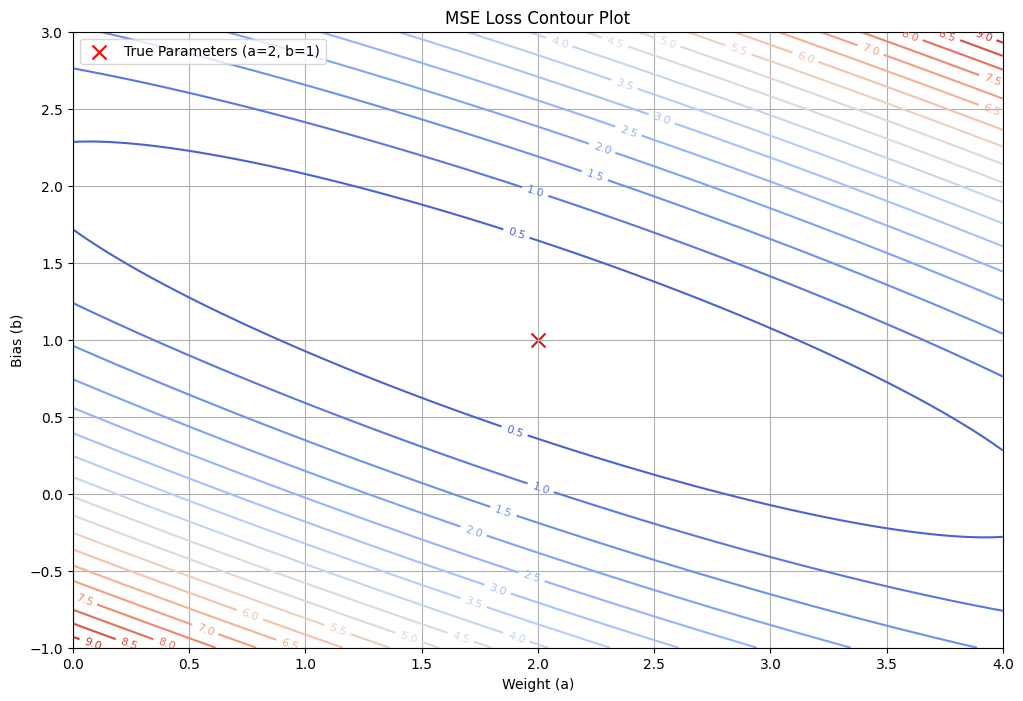

In [20]:
# 등고선
plt.figure(figsize=(12, 8))
contour = plt.contour(A, B, Z, 20, cmap="coolwarm")
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(2, 1, color="red", marker="x", s=100, label="True Parameters (a=2, b=1)")

plt.xlabel("Weight (a)")
plt.ylabel("Bias (b)")
plt.title("MSE Loss Contour Plot")
plt.grid(True)
plt.legend()

plt.show()